In [12]:
import pandas as pd
import numpy as np

file_path = 'WineQT.csv'
wine_data = pd.read_csv(file_path)

print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [13]:
from sklearn.model_selection import train_test_split

print(wine_data.isnull().sum())

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


# Train SGD Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)
print("SGD Classification Report:\n", classification_report(y_test, y_pred_sgd))


# Train Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))



Random Forest Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229

SGD Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.33      0.46        96
           6       0.48      0.91      0.63        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.25      0.25      0.22       229
weighted av

c:\Users\ALIZAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALIZAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ALIZAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

C:\Users\ALIZAR\AppData\Local\Temp\ipykernel_13408\37686405.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='viridis')


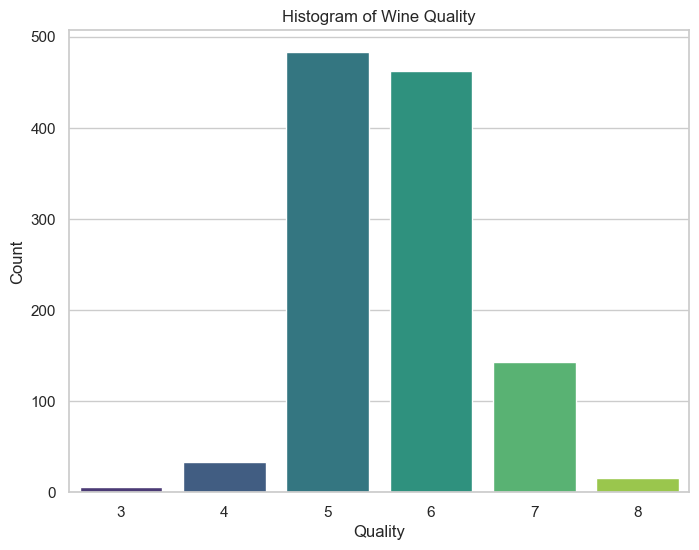

C:\Users\ALIZAR\AppData\Local\Temp\ipykernel_13408\37686405.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='viridis')


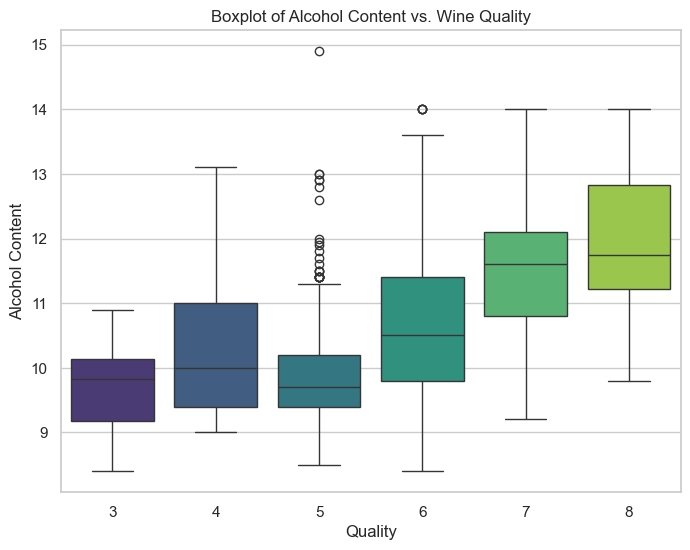

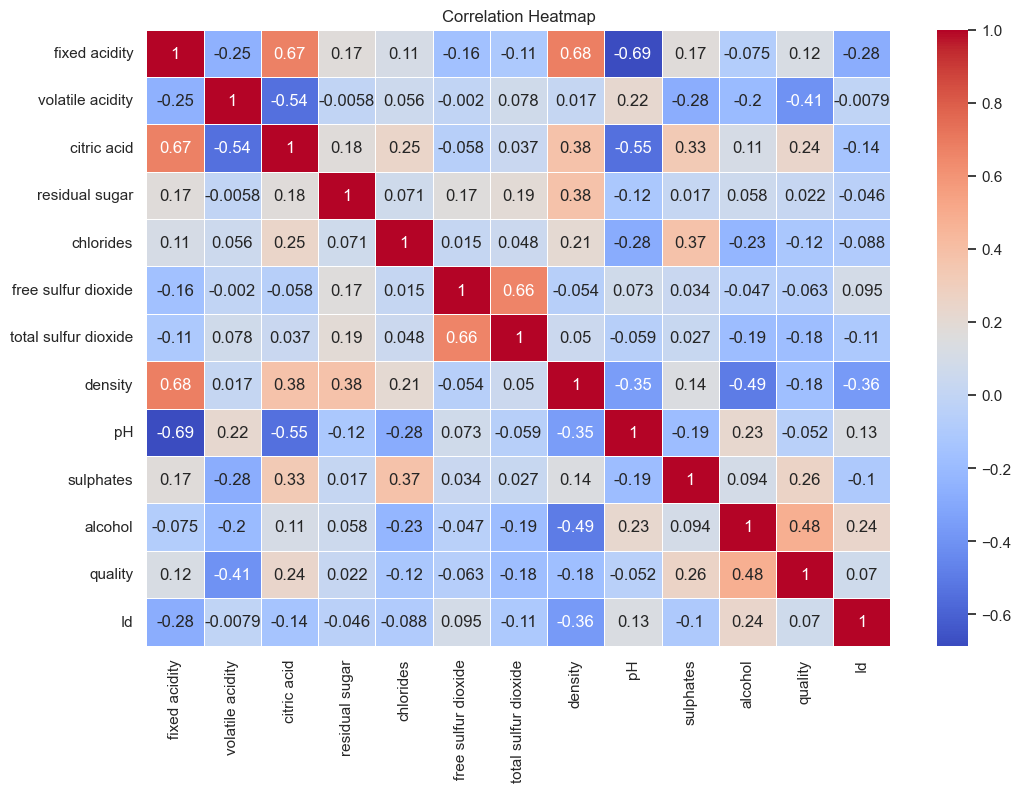

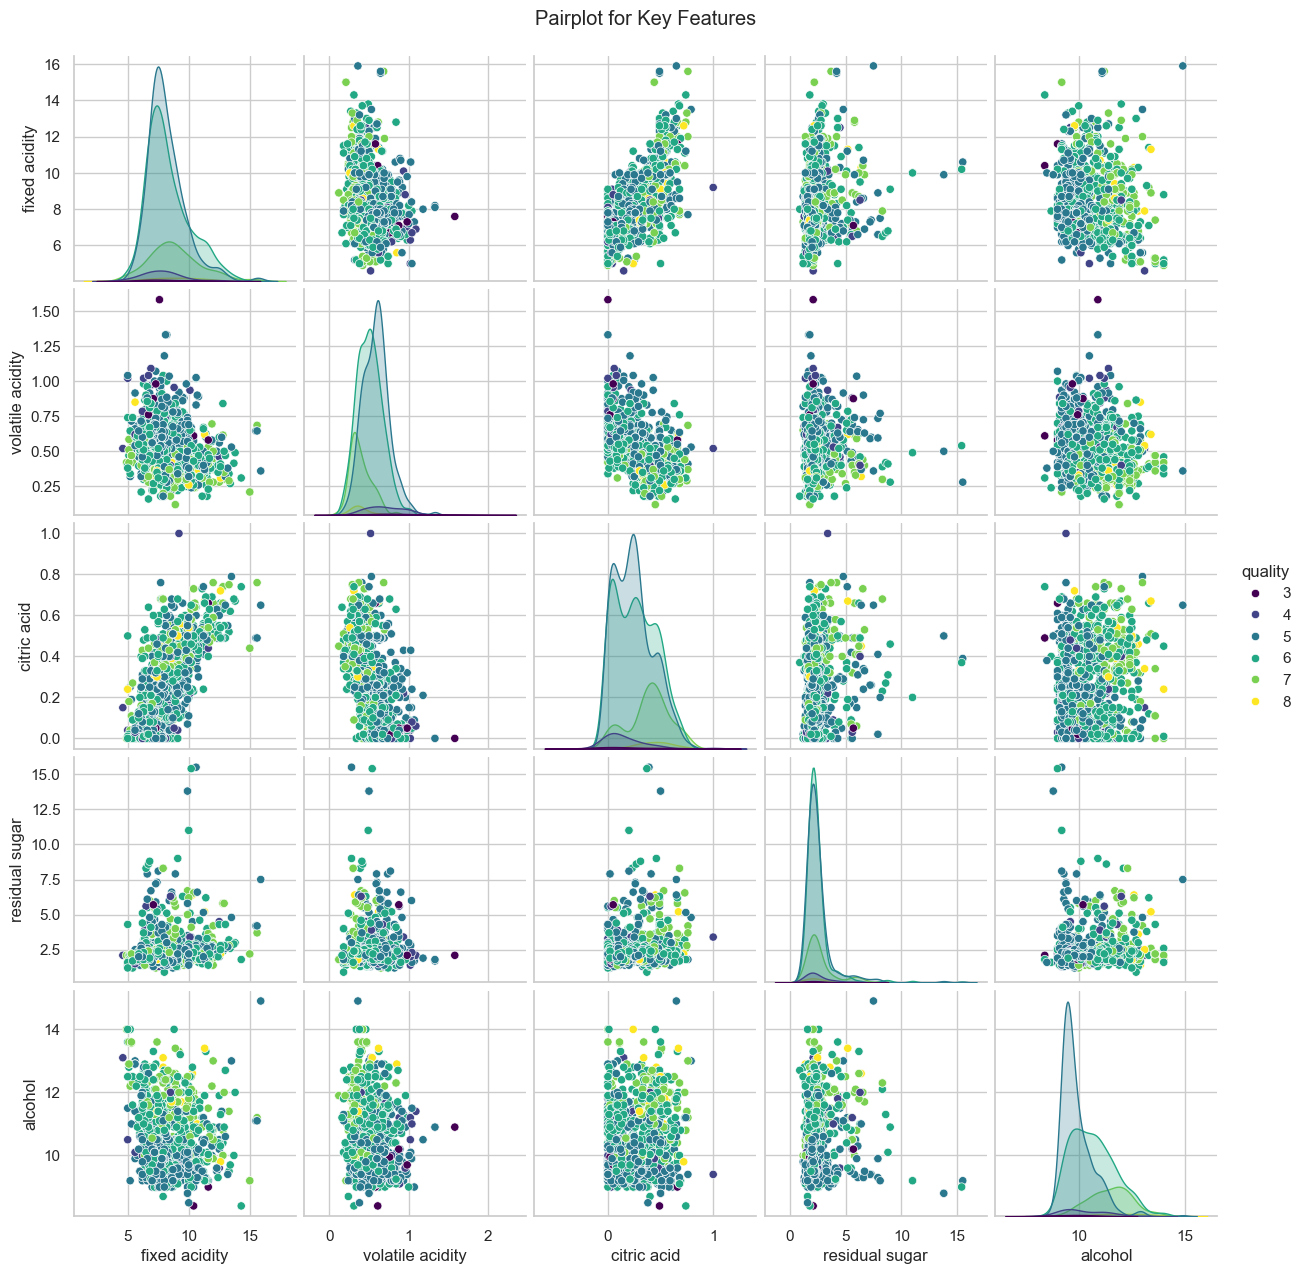

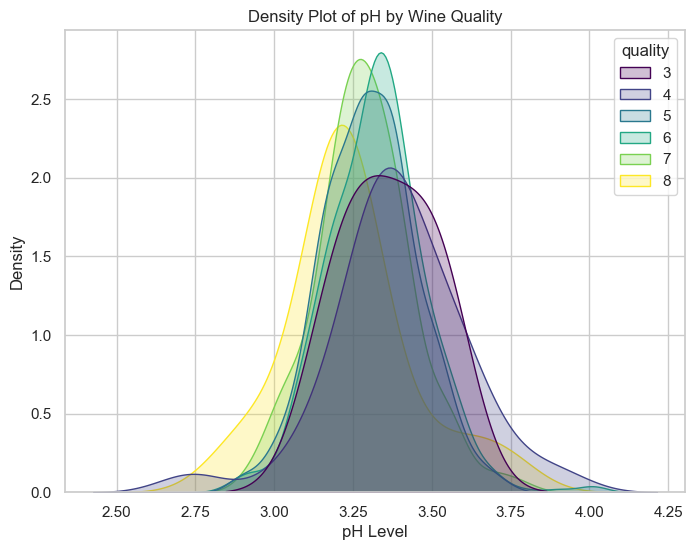

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Histogram of Wine Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Histogram of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Boxplot of Alcohol Content vs. Wine Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_data, palette='viridis')
plt.title('Boxplot of Alcohol Content vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = wine_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for Key Features
sns.pairplot(wine_data, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol'], hue='quality', palette='viridis')
plt.suptitle('Pairplot for Key Features', y=1.02)
plt.show()

# Density Plot of pH
plt.figure(figsize=(8, 6))
sns.kdeplot(data=wine_data, x='pH', hue='quality', fill=True, palette='viridis', common_norm=False)
plt.title('Density Plot of pH by Wine Quality')
plt.xlabel('pH Level')
plt.ylabel('Density')
plt.show()
